# Credit Card customers

> In this [Dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/code?datasetId=982921&sortBy=voteCount) we are faced with the task of determining which of the customers are gonna get churned so bank can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

## Load Data

Let's start... importing libraries and getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

In [2]:
dataset = pd.read_csv('BankChurners.csv')

In [3]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


\
As we can see, there are few rows that should be removed. There are CLIENTNUM ID that unique for all costumers and Naive Bayes rows that dataset creator asks us to ignore.

In [4]:
dataset = dataset.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

\
I also will split the dataset on train and test parts so I can check how does the model I chose will work.

In [5]:
df, test = train_test_split(dataset, test_size=0.15, random_state=42)

In [6]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
233,Existing Customer,44,M,3,Post-Graduate,Divorced,$80K - $120K,Blue,36,6,2,2,17965.0,1644,16321.0,0.921,1767,50,0.923,0.092
9013,Existing Customer,38,F,1,College,Unknown,Less than $40K,Blue,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
3043,Existing Customer,63,F,2,Graduate,Single,Less than $40K,Gold,55,4,1,3,15987.0,1345,14642.0,0.729,3640,56,0.867,0.084
6292,Attrited Customer,44,F,2,Uneducated,Single,Unknown,Blue,32,5,3,3,1486.0,849,637.0,0.621,2380,43,0.870,0.571
2474,Existing Customer,60,M,2,Graduate,Married,$60K - $80K,Blue,50,3,1,2,9033.0,845,8188.0,0.663,1661,35,0.400,0.094


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 233 to 7270
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8607 non-null   object 
 1   Customer_Age              8607 non-null   int64  
 2   Gender                    8607 non-null   object 
 3   Dependent_count           8607 non-null   int64  
 4   Education_Level           8607 non-null   object 
 5   Marital_Status            8607 non-null   object 
 6   Income_Category           8607 non-null   object 
 7   Card_Category             8607 non-null   object 
 8   Months_on_book            8607 non-null   int64  
 9   Total_Relationship_Count  8607 non-null   int64  
 10  Months_Inactive_12_mon    8607 non-null   int64  
 11  Contacts_Count_12_mon     8607 non-null   int64  
 12  Credit_Limit              8607 non-null   float64
 13  Total_Revolving_Bal       8607 non-null   int64  
 14  Avg_Op

\
Let's split our columns on text and numerical, and take a closer look at the data.

In [8]:
obj_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == 'O':
        obj_col.append(i)
    else:
        num_col.append(i)

print('obj_col:', len(obj_col))
print('num_col:', len(num_col))

obj_col: 6
num_col: 14


<ipython-input-9-5db8e5d0fe49>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp['index'], rotation=90)


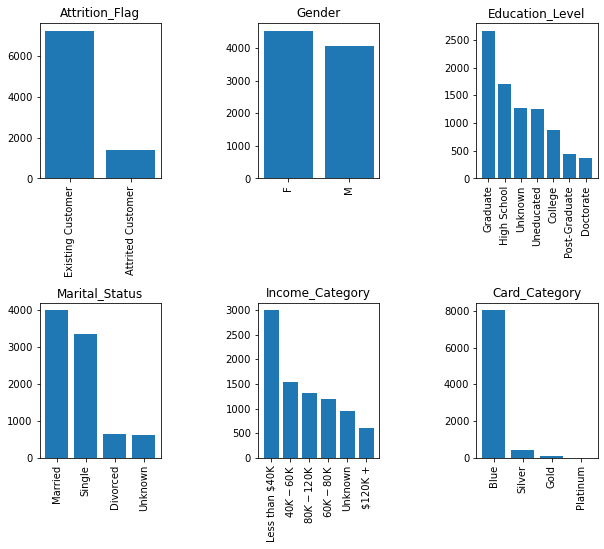

In [9]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(obj_col):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var])
    ax.set_title(var)
    ax.set_xticklabels(tmp['index'], rotation=90)

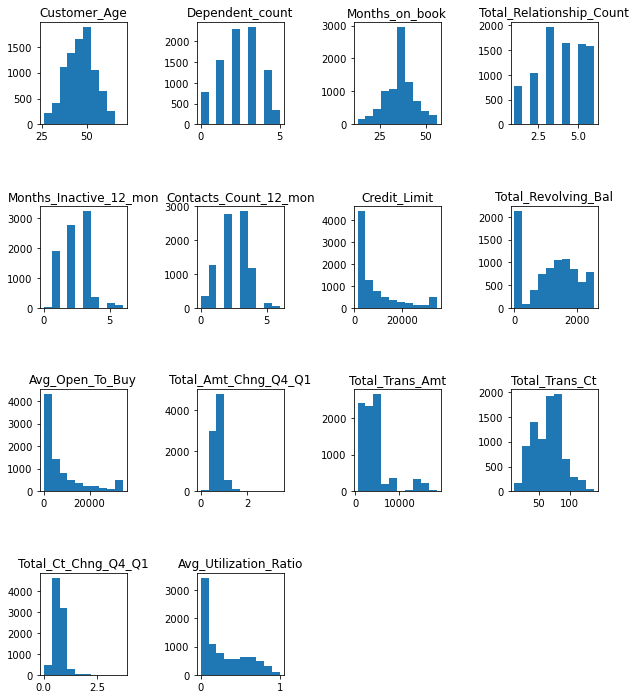

In [10]:
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(num_col):
    ax = fig.add_subplot(4, 4, i+1)
    ax.hist(df[var])
    ax.set_title(var)

In [11]:
print(df.apply(lambda x: sum(x.isnull()) / len(df)))
print(df.apply(lambda x: sum(x == 'Unknown') / len(df)))

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64
Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.148600
Marital_Status              0.072964
Income_Category             0.110027
Card_Category               0.000000
Months_on_book              0.000000
Total_Relati

- We can see a wide spread between existing and attrited customers;
- Men and women are approximately equal in number;
- In Marital_Status, it makes sense to combine the Divorced and Single values later;
- And also most of the customers use blue cards;
- Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy probably has stuffing that I will get rid of later;
- There are no zero values in the dataset, but Education_Level Marital_Status and Income_Category have Unknown values of 15, 7, and 11 percent.

## Data Cleaning

In [12]:
df[df.duplicated(keep=False)]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


\
There are no repeated data, so let's go straight to outliers

In [13]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

df_ = df.loc[detect_outliers(df,num_col)]

In [14]:
def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2

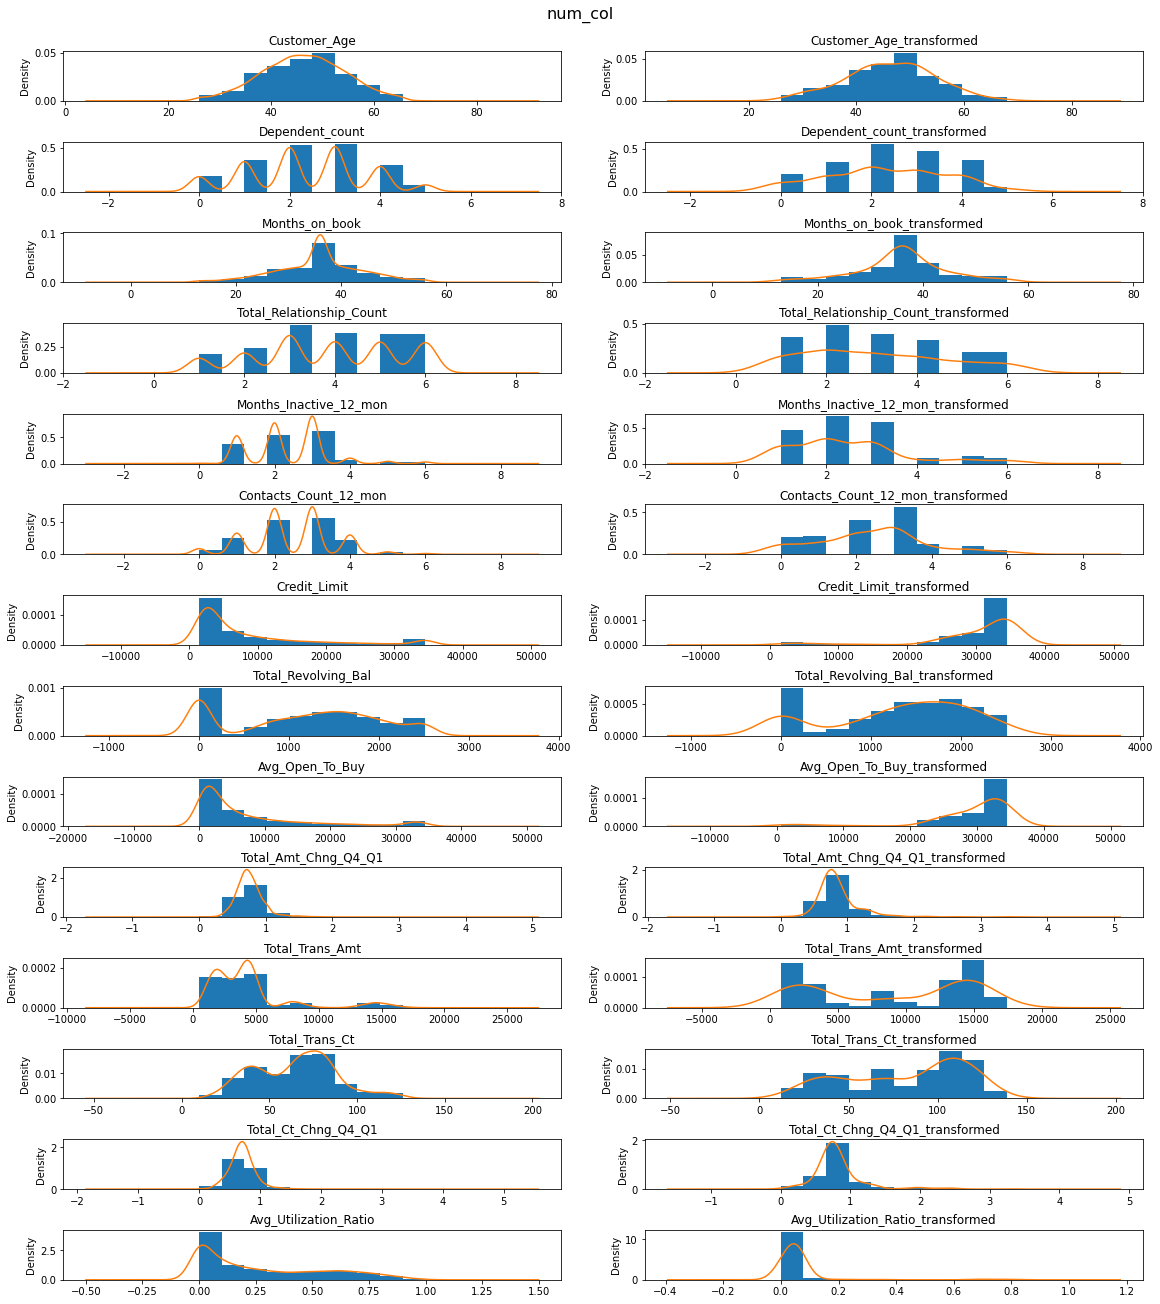

In [15]:
plot_histograms_density(df, num_col, df_, 'num_col')

\
It seems that most of the found outliers belong to Credit_Limit, Avg_Open_To_Buy and Total_Trans_Amt columns. Let's drop them

In [16]:
df = df.drop(detect_outliers(df,num_col),axis = 0).reset_index(drop = True)

In [17]:
print('Rows was',df.shape[0])
print('Rows left',df.shape[0]-df_.shape[0])

Rows was 8320
Rows left 8033


## Feature Engineering

In this step we must encode all necessary features and also take care of 'Unknown' values.
Features we must encode are: Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category and Card_Category.
- Attrition_Flag is boolean feature so we will encode it as 1 Existing Customer and 0 Attrited Customer
- Education_Level, Income_Category and Card_Category are have an order in wich we can encode them. We can use LabelEncoder but I'm not sure in what order it decodes these columns, so I'll do it with the help of the replace function.
- And Gender with Marital_Status don't have any order so we will use get_dummies function on them.\
  
But before encoding Marital_Status I will use IterativeImputer to replace 'Unknown' values.

In [18]:
df = pd.get_dummies(data=df,columns=['Gender'])

In [19]:
repl = ['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']
for i in repl:
    print(i,': ',df[i].unique())

Attrition_Flag :  ['Existing Customer' 'Attrited Customer']
Education_Level :  ['Post-Graduate' 'College' 'Graduate' 'Uneducated' 'Doctorate' 'Unknown'
 'High School']
Marital_Status :  ['Divorced' 'Unknown' 'Single' 'Married']
Income_Category :  ['$80K - $120K' 'Less than $40K' 'Unknown' '$60K - $80K' '$120K +'
 '$40K - $60K']
Card_Category :  ['Blue' 'Gold' 'Silver' 'Platinum']


In [20]:
df['Marital_Status'].replace(to_replace=['Single', 'Divorced'], value='Single', inplace = True)

In [21]:
df['Attrition_Flag'].replace(to_replace=['Existing Customer', 'Attrited Customer'], 
                              value=[1,0], inplace = True)
df['Education_Level'].replace(to_replace=['Post-Graduate', 'College', 'Graduate', 'Uneducated', 
                                          'Doctorate', 'Unknown', 'High School'],  
                              value=[5,3,4,1,6,0,2], inplace = True)
df['Marital_Status'].replace(to_replace=['Single', 'Unknown', 'Married'],  
                              value=[1,0,2], inplace = True)
df['Income_Category'].replace(to_replace=['$80K - $120K', 'Less than $40K', 'Unknown',
                                          '$60K - $80K', '$120K +', '$40K - $60K'],  
                              value=[4,1,0,3,5,2], inplace = True)
df['Card_Category'].replace(to_replace=['Blue', 'Gold', 'Silver', 'Platinum'], 
                              value=[1,2,3,4], inplace = True)

In [22]:
un_to_nan = ['Income_Category','Education_Level','Marital_Status']
for i in un_to_nan:
    df[i].replace(to_replace=[0], value=np.nan, inplace = True)

In [23]:
imp = IterativeImputer(max_iter=10,verbose=0)
imp.fit(df)
impute_df = imp.transform(df)
impute_df = pd.DataFrame(impute_df, columns=df.columns)

In [24]:
impute_df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,1.0,44.0,3.0,5.000000,1.000000,4.000000,1.0,36.0,6.0,2.0,...,17965.0,1644.0,16321.0,0.921,1767.0,50.0,0.923,0.092,0.0,1.0
1,1.0,38.0,1.0,3.000000,1.405733,1.000000,1.0,32.0,2.0,3.0,...,2609.0,1259.0,1350.0,0.871,8677.0,96.0,0.627,0.483,1.0,0.0
2,1.0,63.0,2.0,4.000000,1.000000,1.000000,2.0,55.0,4.0,1.0,...,15987.0,1345.0,14642.0,0.729,3640.0,56.0,0.867,0.084,1.0,0.0
3,0.0,44.0,2.0,1.000000,1.000000,1.105719,1.0,32.0,5.0,3.0,...,1486.0,849.0,637.0,0.621,2380.0,43.0,0.870,0.571,1.0,0.0
4,1.0,60.0,2.0,4.000000,2.000000,3.000000,1.0,50.0,3.0,1.0,...,9033.0,845.0,8188.0,0.663,1661.0,35.0,0.400,0.094,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,0.0,44.0,1.0,4.000000,1.000000,2.000000,1.0,38.0,3.0,2.0,...,4142.0,2517.0,1625.0,0.809,2104.0,44.0,0.833,0.608,1.0,0.0
8316,0.0,53.0,3.0,2.000000,1.000000,1.526635,1.0,36.0,4.0,3.0,...,7939.0,0.0,7939.0,0.551,2269.0,42.0,0.312,0.000,1.0,0.0
8317,1.0,42.0,4.0,4.000000,1.510021,1.000000,1.0,32.0,3.0,1.0,...,2314.0,1547.0,767.0,0.804,4678.0,74.0,1.000,0.669,1.0,0.0
8318,1.0,40.0,3.0,3.056843,1.000000,2.000000,1.0,28.0,4.0,1.0,...,3563.0,1707.0,1856.0,0.506,1482.0,42.0,0.312,0.479,0.0,1.0


In [25]:
for i in un_to_nan:
    df[i] = np.round(impute_df[i])

In [26]:
df['Marital_Status'].replace(to_replace=[1,2],  
                              value=['Single', 'Married'], inplace = True)
df = pd.get_dummies(data=df,columns=['Marital_Status'])

In [27]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Married,Marital_Status_Single
0,1,44,3,5.0,4.0,1,36,6,2,2,...,16321.0,0.921,1767,50,0.923,0.092,0,1,0,1
1,1,38,1,3.0,1.0,1,32,2,3,3,...,1350.0,0.871,8677,96,0.627,0.483,1,0,0,1
2,1,63,2,4.0,1.0,2,55,4,1,3,...,14642.0,0.729,3640,56,0.867,0.084,1,0,0,1
3,0,44,2,1.0,1.0,1,32,5,3,3,...,637.0,0.621,2380,43,0.870,0.571,1,0,0,1
4,1,60,2,4.0,3.0,1,50,3,1,2,...,8188.0,0.663,1661,35,0.400,0.094,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,0,44,1,4.0,2.0,1,38,3,2,5,...,1625.0,0.809,2104,44,0.833,0.608,1,0,0,1
8316,0,53,3,2.0,2.0,1,36,4,3,6,...,7939.0,0.551,2269,42,0.312,0.000,1,0,0,1
8317,1,42,4,4.0,1.0,1,32,3,1,2,...,767.0,0.804,4678,74,1.000,0.669,1,0,1,0
8318,1,40,3,3.0,2.0,1,28,4,1,1,...,1856.0,0.506,1482,42,0.312,0.479,0,1,0,1


\
Our dataset is ready to data scaling and model training

But first we will do the same with 'test' part of our data.

In [28]:
test['Marital_Status'].replace(to_replace=['Single', 'Divorced'], value='Single', inplace = True)
test = pd.get_dummies(data=test,columns=['Gender'])
repl = ['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']
test['Attrition_Flag'].replace(to_replace=['Existing Customer', 'Attrited Customer'], 
                              value=[1,0], inplace = True)
test['Education_Level'].replace(to_replace=['Post-Graduate', 'College', 'Graduate', 'Uneducated', 
                                          'Doctorate', 'Unknown', 'High School'],  
                              value=[5,3,4,1,6,0,2], inplace = True)
test['Marital_Status'].replace(to_replace=['Single', 'Unknown', 'Married'],  
                              value=[1,0,2], inplace = True)
test['Income_Category'].replace(to_replace=['$80K - $120K', 'Less than $40K', 'Unknown',
                                          '$60K - $80K', '$120K +', '$40K - $60K'],  
                              value=[4,1,0,3,5,2], inplace = True)
test['Card_Category'].replace(to_replace=['Blue', 'Gold', 'Silver', 'Platinum'], 
                              value=[1,2,3,4], inplace = True)
un_to_nan = ['Income_Category','Education_Level','Marital_Status']
for i in un_to_nan:
    test[i].replace(to_replace=[0], value=np.nan, inplace = True)
imp = IterativeImputer(max_iter=10,verbose=0)
imp.fit(test)
impute_test = imp.transform(test)
impute_test = pd.DataFrame(impute_test, columns=test.columns)
for i in un_to_nan:
    impute_test[i] = np.round(impute_test[i])
test = impute_test
test['Marital_Status'].replace(to_replace=[1,2],  
                              value=['Single', 'Married'], inplace = True)
test = pd.get_dummies(data=test,columns=['Marital_Status'])
test.head()

D:\games\Conda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Married,Marital_Status_Single
0,1.0,48.0,3.0,1.0,1.0,1.0,39.0,4.0,3.0,4.0,...,1483.0,0.703,3734.0,64.0,0.882,0.504,1.0,0.0,0,1
1,1.0,59.0,1.0,1.0,1.0,1.0,53.0,5.0,5.0,4.0,...,623.0,0.706,4010.0,79.0,0.717,0.716,0.0,1.0,0,1
2,1.0,37.0,2.0,4.0,1.0,1.0,36.0,4.0,3.0,3.0,...,747.0,0.879,4727.0,67.0,0.914,0.569,1.0,0.0,0,1
3,1.0,47.0,3.0,6.0,2.0,1.0,36.0,4.0,2.0,3.0,...,3270.0,0.940,4973.0,74.0,0.850,0.317,0.0,1.0,0,1
4,1.0,42.0,3.0,3.0,4.0,1.0,33.0,3.0,3.0,2.0,...,1544.0,0.524,1454.0,35.0,0.522,0.584,0.0,1.0,0,1


## Data Scaling

In [29]:
#Some data scaling metods may affect on our y so we will split X and y before scaling
y = df["Attrition_Flag"]
df = df.drop("Attrition_Flag", axis=1)
# and also for test set
yt_test = test["Attrition_Flag"]
test = test.drop("Attrition_Flag", axis=1)

\
I completely forgot about this stage, but I also will throw out variables wich have low variance.

In [30]:
variance_threshold = 0.1
selection = VarianceThreshold(threshold=variance_threshold)
selection.fit(df)

VarianceThreshold(threshold=0.1)

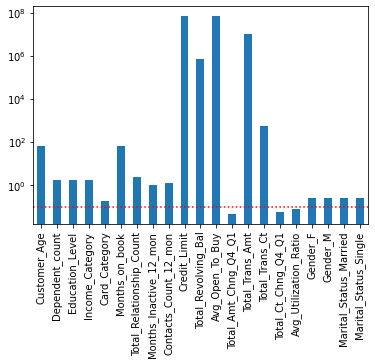

In [31]:
ax = pd.Series(selection.variances_, index=df.columns).plot(kind='bar', logy=True);
ax.axhline(variance_threshold, ls='dotted', c='r');

In [32]:
df = pd.DataFrame(selection.transform(df), columns=df.columns[selection.get_support()])
test = pd.DataFrame(selection.transform(test), columns=test.columns[selection.get_support()])

\
On this dataset, I tried several types of data scaling, but models was showed the best performance on normalized data, so in the future I will use MinMaxScaler data on the model.

In [33]:
scaler = MinMaxScaler()
min_max_df = scaler.fit_transform(df)
min_max_df = pd.DataFrame(min_max_df, index= df.index, columns=df.columns)
# and of course for test
min_max_test = scaler.fit_transform(test)
min_max_test = pd.DataFrame(min_max_test, index=test.index, columns=test.columns)

In [34]:
# this one had the worst scores
scaler = Normalizer()
zscore_df = scaler.fit_transform(df)
zscore_df = pd.DataFrame(zscore_df, index=df.index, columns=df.columns)

In [35]:
# this one was ok but MinMaxScaler have better performanse
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_t = discretizer.fit_transform(df)
df_d_ew = pd.DataFrame(X_t, index=df.index, columns=df.columns)

## Model Selection

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(min_max_df, y, test_size=0.3, random_state=0)

We are faced with a classification problem with two variables. I chose models that can fit her and will check their performance with the ROC curve.

In [37]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    CategoricalNB(), 
    BernoulliNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

D:\games\Conda\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


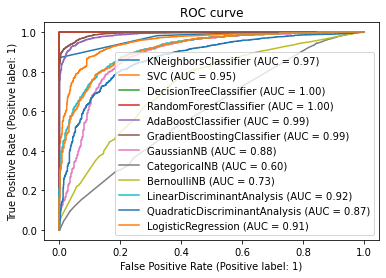

In [38]:
fig, ax = plt.subplots()

model_displays = {}
for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = type(clf).__name__
    model_displays[type(clf).__name__] = plot_roc_curve(
        clf, X_train, Y_train, ax=ax, name=name)
_ = ax.set_title('ROC curve')

By analyzing the ROC curve, I will focus on 5 models that have the best scores.
Let's analyze their confusion matrices and chose the best one.

In [39]:
potential_model = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']
for clf in classifiers:
    name = type(clf).__name__
    if name in potential_model:
        predictions =clf.predict(X_test)
        cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
        cr = classification_report(y_true=Y_test, 
                                   y_pred=predictions,
                                   target_names=['Existing Customer', 'Attrited Customer'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        print(f"\n{name}:\n{cr}")
        print(f"{cm}")


KNeighborsClassifier:
                   precision    recall  f1-score   support

Existing Customer       0.73      0.49      0.59       431
Attrited Customer       0.90      0.96      0.93      2065

         accuracy                           0.88      2496
        macro avg       0.82      0.73      0.76      2496
     weighted avg       0.87      0.88      0.87      2496

[[ 213  218]
 [  78 1987]]

DecisionTreeClassifier:
                   precision    recall  f1-score   support

Existing Customer       0.79      0.77      0.78       431
Attrited Customer       0.95      0.96      0.95      2065

         accuracy                           0.93      2496
        macro avg       0.87      0.86      0.87      2496
     weighted avg       0.92      0.93      0.92      2496

[[ 331  100]
 [  87 1978]]

RandomForestClassifier:
                   precision    recall  f1-score   support

Existing Customer       0.92      0.76      0.83       431
Attrited Customer       0.95      0.99  

\
What can we see.  
The best classifier is GradientBoostingClassifier with precision on Attrited Customer = 0.96, recall = 0.98, F1 = 0.97 and it is consistent with the AUC metric - 0.99 in the ROC above

## Model Training and Testing

In [40]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
print('Validation:', accuracy_score(Y_test, GBC.predict(X_test)))
print('Test:', accuracy_score(yt_test, GBC.predict(min_max_test)))

Validation: 0.9503205128205128
Test: 0.9519736842105263
